In [1]:
import mlrose_hiive
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Initialize fitness function object using pre-defined class
fitness = mlrose_hiive.Queens()

In [3]:
# Define optimization problem object
problem = mlrose_hiive.DiscreteOpt(length = 8, fitness_fn = fitness, maximize=False, max_val=8)

In [4]:
# Define decay schedule
schedule = mlrose_hiive.ExpDecay()

In [13]:
# Solve using simulated annealing - attempt 1         
init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])
best_state, best_fitness, _ = mlrose_hiive.simulated_annealing(
                                    problem, schedule = schedule, max_attempts = 10, 
                                    max_iters = 1000, init_state = init_state,
                                    random_state = 1)

In [14]:
print('The best state found is: ', best_state)

The best state found is:  [6 3 7 2 1 5 2 5]


In [15]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  3.0


In [16]:
# Solve using simulated annealing - attempt 2
best_state, best_fitness, _ = mlrose_hiive.simulated_annealing(
                                problem, schedule = schedule, max_attempts = 100, 
                                max_iters = 1000, init_state = init_state,
                                random_state = 1)

In [17]:
print(best_state)

[4 2 0 6 1 7 5 3]


In [18]:
print(best_fitness)

0.0


In [19]:
mlrose_hiive.NeuralNetwork(hidden_nodes = [], activation = 'sigmoid', 
                                    algorithm = 'random_hill_climb', 
                                    max_iters = 1000, bias = True, is_classifier = True, 
                                    learning_rate = 0.01, early_stopping = True, 
                                    clip_max = 5, max_attempts = 100, random_state = 3)

NeuralNetwork(activation='sigmoid', clip_max=5, early_stopping=True,
              hidden_nodes=[], learning_rate=0.01, max_attempts=100,
              max_iters=1000, random_state=3)

In [20]:
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner

# create a runner class and solve the problem
sa = SARunner(problem=problem,
              experiment_name='queens8_sa',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=123456,
              iteration_list=2 ** np.arange(11),
              max_attempts=500,
              temperature_list=[0.1, 0.5, 0.75, 1.0, 2.0, 5.0],
              decay_list=[mlrose_hiive.GeomDecay])

# the two data frames will contain the results
df_run_stats, df_run_curves = sa.run()


In [21]:
df_run_curves

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.002222,11.0,0.0,0.1,1024
1,1,0.009981,9.0,2.0,0.1,1024
2,2,0.013444,8.0,4.0,0.1,1024
3,3,0.019003,8.0,5.0,0.1,1024
4,4,0.020578,8.0,7.0,0.1,1024
...,...,...,...,...,...,...
5623,920,0.020083,0.0,1079.0,5.0,1024
5624,921,0.020305,0.0,1080.0,5.0,1024
5625,922,0.020515,0.0,1081.0,5.0,1024
5626,923,0.020888,0.0,1082.0,5.0,1024


In [22]:
# fig, axes = plt.subplots(nrows=1,ncols=2)
# axes.flatten()
# axes[0].plot(df_run_curves.groupby(['Temperature'])['Iteration'], df_run_curves['Time'])
# axes[1].plot(df_run_curves.groupby(['Temperature'])['Iteration'], df_run_curves['FEvals'])

In [18]:
df_run_stats[df_run_stats['schedule_init_temp']==0.1].head()

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters
0,0,11.0,0,0.000847,"[1, 2, 2, 1, 0, 3, 7, 3]",geometric,0.1,0.99,0.001,0.099999,0.1,1024
1,1,9.0,2,0.007310,"[1, 2, 2, 0, 0, 3, 7, 3]",geometric,0.1,0.99,0.001,0.099993,0.1,1024
2,2,8.0,4,0.011639,"[1, 2, 2, 0, 0, 3, 7, 5]",geometric,0.1,0.99,0.001,0.099988,0.1,1024
3,4,8.0,7,0.018238,"[1, 2, 2, 5, 0, 3, 7, 5]",geometric,0.1,0.99,0.001,0.099982,0.1,1024
4,8,5.0,13,0.027923,"[1, 2, 7, 5, 0, 3, 5, 5]",geometric,0.1,0.99,0.001,0.099972,0.1,1024


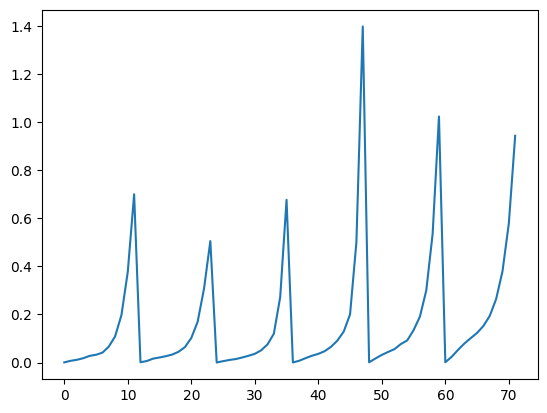

In [22]:
df_run_stats['Time'].plot()
plt.show()